In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [11]:
file = open('Lab6StyrofoamCup1.csv', 'r')
time_total, temperature_total  = np.loadtxt("Lab6StyrofoamCup1.csv", delimiter=",", skiprows=1, usecols=(0,1), unpack=True)

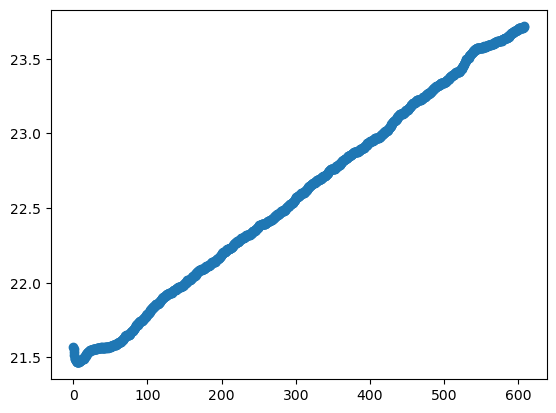

In [12]:
plt.scatter(time_total, temperature_total)

In [13]:
start_time = 100
stop_time = 500
in_range = (time_total >= start_time) & (time_total <= stop_time)
time, temperature = time_total[in_range], temperature_total[in_range]

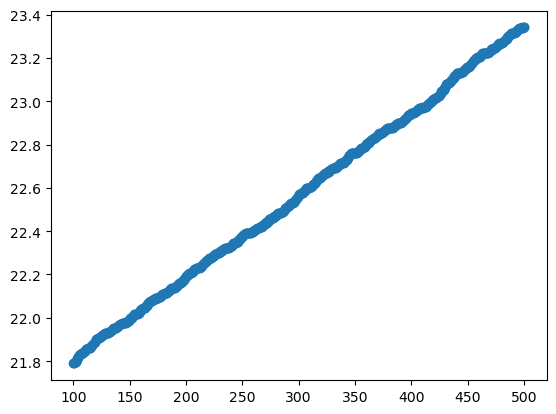

In [14]:
plt.scatter(time, temperature)

Fitted ΔT₀: -0.7699322066240455
Fitted β: -10818700643.892403


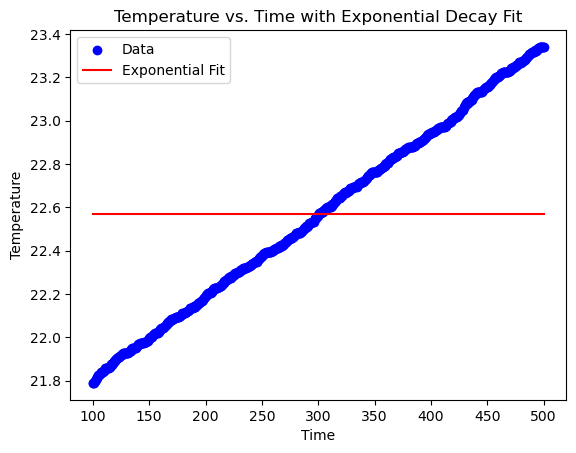

In [90]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Replace these with your actual data arrays

# Estimate final temperature (equilibrium temperature)
T_final = np.mean(temperature[-5:])  # Averaging the last few points
Delta_T = temperature - T_final      # Calculate the temperature difference

# Define the exponential decay model for fitting
def exponential_model(t, T0, beta):
    return T0 * np.exp(-t / beta) + T_final

# Perform the fit
initial_guess = [Delta_T[0], 5900]  # Initial guess for ΔT₀ and β; adjust as needed
params, covariance = curve_fit(exponential_model, time, temperature, p0=initial_guess)
T0_fit, beta_fit = params

print(f"Fitted ΔT₀: {T0_fit}")
print(f"Fitted β: {beta_fit}")

# Generate model predictions for plotting
T_model = exponential_model(time, T0_fit, beta_fit)

# Plot the original data and fitted curve
plt.scatter(time, temperature, label="Data", color="blue")
plt.plot(time, T_model, label="Exponential Fit", color="red")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature vs. Time with Exponential Decay Fit")
plt.legend()
plt.show()


Fitted delta_T0: 21.442281376005422
Fitted beta: 5876.33543162963


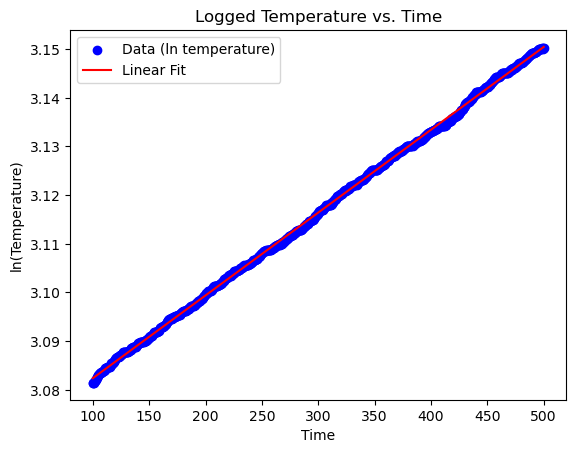

In [43]:
ln_temperature = np.log(temperature)

# Perform linear regression on ln_temperature vs. time
slope, intercept, r_value, p_value, std_err = linregress(time, ln_temperature)

# Calculate ΔT₀ and β from the slope and intercept
T0_fit = np.exp(intercept)
beta_fit = 1 / slope

print(f"Fitted delta_T0: {T0_fit}")
print(f"Fitted beta: {beta_fit}")

# Plot the semi-log data and the linear fit
plt.scatter(time, ln_temperature, label='Data (ln temperature)', color='blue')
plt.plot(time, slope * time + intercept, label='Linear Fit', color='red')
plt.xlabel('Time')
plt.ylabel('ln(Temperature)')
plt.title("Logged Temperature vs. Time")
plt.legend()
plt.show()

In [47]:
m = 0.114 # kg
c = 4184 # J/ kg C
l = 0.0028 # m
A = 2 * np.pi * 3.105 * 4 *10**-4 #m^2
beta = beta_fit 

k = (m * c * l) / (A * beta)
print(f"Calculated k: {k}") # W/msC

Calculated k: 0.029123697816010333


In [96]:
file = open('Lab6MetalCan.csv', 'r')
time_total_can, temperature_total_can  = np.loadtxt("Lab6MetalCan.csv", delimiter=",", skiprows=1, usecols=(0,1), unpack=True)

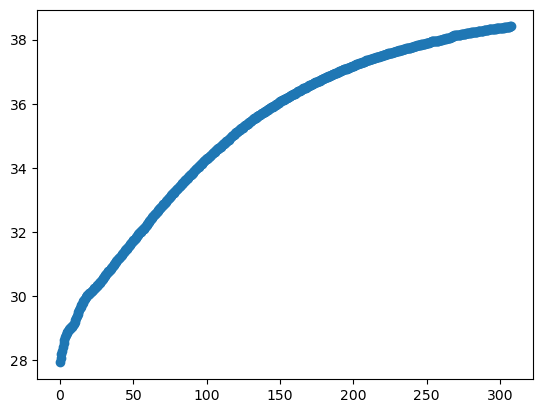

In [84]:
plt.scatter(time_total_can, temperature_total_can)

In [85]:
start_time = 100
stop_time = 500
in_range = (time_total_can >= start_time) & (time_total_can <= stop_time)
time_can, temperature_can = time_total_can[in_range], temperature_total_can[in_range]

Fitted delta_T0: 33.268248067254824
Fitted beta: 1947.7343231204227


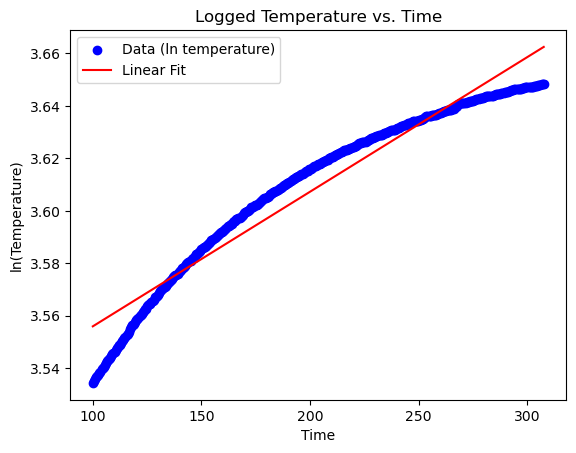

In [86]:
ln_temperature_can = np.log(temperature_can)

# Perform linear regression on ln_temperature vs. time
slope_can, intercept_can, r_value_can, p_value_can, std_err_can = linregress(time_can, ln_temperature_can)

# Calculate ΔT₀ and β from the slope and intercept
T0_fit_can = np.exp(intercept_can)
beta_fit_can = 1 / slope_can

print(f"Fitted delta_T0: {T0_fit_can}")
print(f"Fitted beta: {beta_fit_can}")

# Plot the semi-log data and the linear fit
plt.scatter(time_can, ln_temperature_can, label='Data (ln temperature)', color='blue')
plt.plot(time_can, slope_can * time_can + intercept_can, label='Linear Fit', color='red')
plt.xlabel('Time')
plt.ylabel('ln(Temperature)')
plt.title("Logged Temperature vs. Time")
plt.legend()
plt.show()

In [87]:
m = 0.087 # kg
c = 4184 # J/ kg C
l = 0.000127 # m
A = 2 * np.pi * 3.523 * 5 *10**-4 #m^2
beta_can = beta_fit_can 

k = (m * c * l) / (A * beta_can)
print(f"Calculated k: {k}") # W/msC

Calculated k: 0.0021444820532399425


Fitted ΔT₀: -16.534667623688005
Fitted β: 74.94390969810618


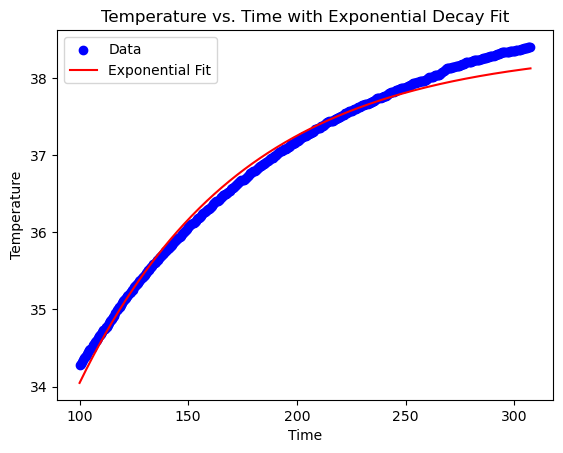

In [100]:
# Estimate final temperature (equilibrium temperature)
T_final = np.mean(temperature_can[-5:])  # Averaging the last few points
Delta_T = temperature_can - T_final      # Calculate the temperature difference

# Define the exponential decay model for fitting
def exponential_model(t, T0, beta):
    return T0 * np.exp(-t / beta) + T_final

# Perform the fit
initial_guess = [temperature_can[0], 100]  # Initial guess for ΔT₀ and β; adjust as needed
params, covariance = curve_fit(exponential_model, time_can, temperature_can, p0=initial_guess)
T0_fit, beta_fit_can = params

print(f"Fitted ΔT₀: {T0_fit}")
print(f"Fitted β: {beta_fit_can}")

# Generate model predictions for plotting
T_model = exponential_model(time_can, T0_fit, beta_fit_can)

# Plot the original data and fitted curve
plt.scatter(time_can, temperature_can, label="Data", color="blue")
plt.plot(time_can, T_model, label="Exponential Fit", color="red")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature vs. Time with Exponential Decay Fit")
plt.legend()
plt.show()


In [99]:
m = 0.087 # kg
c = 4184 # J/ kg C
l = 0.000127 # m
A = 2 * np.pi * 3.523 * 5 *10**-4 #m^2
beta_can = beta_fit_can 

k = (m * c * l) / (A * beta_can)
print(f"Calculated k: {k}") # W/msC

Calculated k: 0.055733337112121605
